In [13]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('yetti desember.xlsx')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         704 non-null    datetime64[ns]
 1   Description  704 non-null    object        
 2   Branch       704 non-null    int64         
 3   Amount       704 non-null    float64       
 4   status       704 non-null    object        
 5   Balance      704 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 33.1+ KB


In [4]:
df1['Amount'] = df1['Amount'].astype(int)
df1['Balance'] = df1['Balance'].astype(int)
df1

,Date,Description,Branch,Amount,status,Balance
0,2023-12-01,TRSF E-BANKING DB 12/01 95031 ACH NUR HASAN,0,5000000,DB,7985568
1,2023-12-01,TRSF E-BANKING DB 12/01 95031 SYAFRIANSYAH,998,1200000,DB,6785568
2,2023-12-01,KR OTOMATIS LLG-BPD BALI SURYANINGSIH ...,938,2600000,CR,9385568
3,2023-12-01,TRSF E-BANKING CR 12/01 95031 15.000.000...,998,9833500,CR,19219068
4,2023-12-01,TRSF E-BANKING DB 12/01 95031 AINI ARIFAH,998,500000,DB,18719068
...,...,...,...,...,...,...
699,2023-12-30,TRSF E-BANKING CR 3012/FTSCY/WS95031 855...,6140,85500000,CR,105687203
700,2023-12-30,TRSF E-BANKING DB 3012/FTSCY/WS95011 600...,6170,60000000,DB,45687203
701,2023-12-30,TRSF E-BANKING DB 3012/FTSCY/WS95011 300...,6170,30000000,DB,15687203
702,2023-12-31,BUNGA,0,140,CR,15687344


In [5]:
def extract_string_from_back(s):
    result = ''
    spaces = 0
    for char in s[::-1]:
        if char.isspace():
            spaces += 1
        elif char.isdigit() or char.islower():
            break
        elif spaces > 2:
            break
        else:
            result = char + result
            spaces = 0
    return result

In [6]:
df1["Nama"] = df1["Description"].apply(extract_string_from_back)
df1.drop(columns=['Description'], inplace=True)



In [7]:
df1

,Date,Branch,Amount,status,Balance,Nama
0,2023-12-01,0,5000000,DB,7985568,ACHNURHASAN
1,2023-12-01,998,1200000,DB,6785568,SYAFRIANSYAH
2,2023-12-01,938,2600000,CR,9385568,
3,2023-12-01,998,9833500,CR,19219068,WARDI
4,2023-12-01,998,500000,DB,18719068,AINIARIFAH
...,...,...,...,...,...,...
699,2023-12-30,6140,85500000,CR,105687203,FEREKESTRADA
700,2023-12-30,6170,60000000,DB,45687203,SISWANTO
701,2023-12-30,6170,30000000,DB,15687203,AHMADWAHIB
702,2023-12-31,0,140,CR,15687344,BUNGA


In [8]:
df_grouped = df1.groupby(['Nama', 'status'])['Amount'].agg(['sum', 'size']).reset_index()
df_grouped.rename(columns={'sum': 'Total Amount', 'size': 'Jumlah transaksi'}, inplace=True)


In [9]:
df_grouped

,Nama,status,Total Amount,Jumlah transaksi
0,,CR,11510500,4
1,,DB,15052486,11
2,-AT,CR,650000,1
3,-BRIUN,CR,15000000,1
4,-HO,DB,200000,1
...,...,...,...,...
131,YETISS,CR,11650000,5
132,YETISS,DB,7358736,10
133,YULISSUPARTINI,DB,502500,2
134,YULVANAAYUFEBRIA,DB,14613000,3


In [10]:
df_grouped.to_excel('Desember_Yetti_histori.xlsx', index=False)


In [33]:
def categorical_bar_plot(data, column,column2, title):
    plt.figure(figsize=(40,9))
    datata = data.sort_values(by= column2, ascending=False)
    ax = sns.barplot(x=column, y=column2, data=datata, order=data[column])
    for i in ax.containers:
        ax.bar_label(i)
    plt.title(title, fontsize=15)
    plt.show()


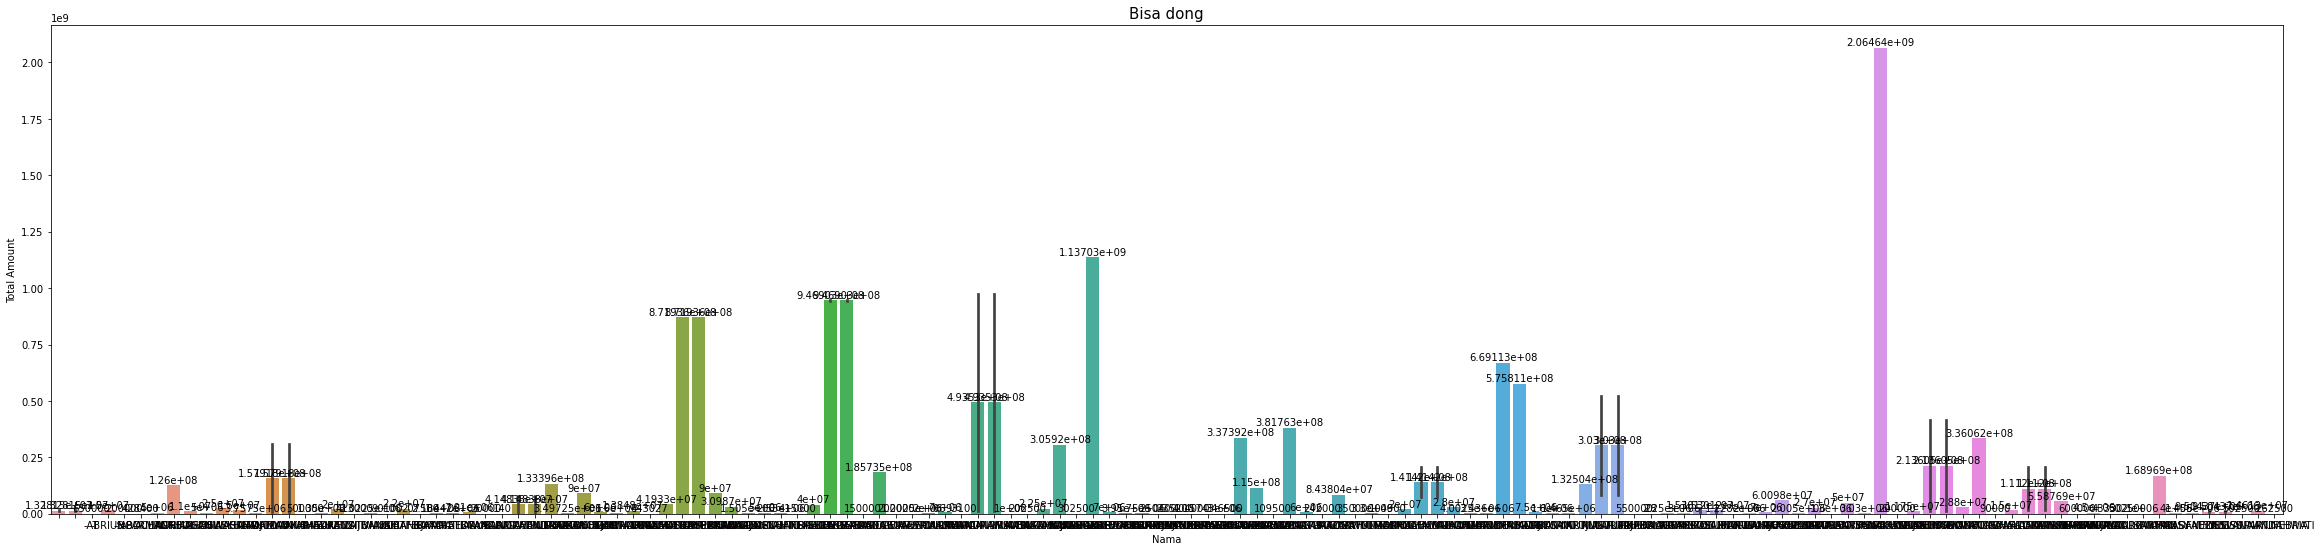

In [34]:
categorical_bar_plot(df_grouped, "Nama","Total Amount" , "Bisa dong")